# Smart Library for Getting Weather Details for Free  

## My task was to develop a module in python so that Developers and Makers can use this for getting weather Updates at Free of Cost.

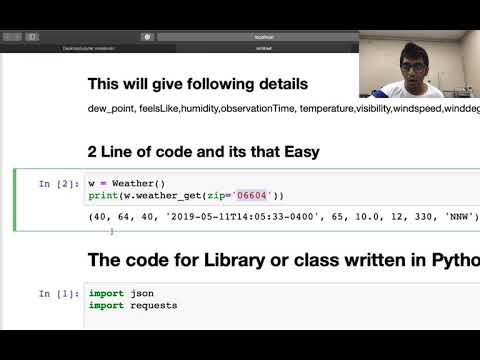

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('TyFPn8mEEv0')

What i did is i went to popular website for weather details and when i enter city and hit enter i monitored the network traffic. i did reverse engineering on website and found the API that they were using for weather Details. using webscrapping i extract all details and thats how i made a module to get weather Data based on ZipCode 

# How to use this Library 

## This will give following details 
dew_point, feelsLike,humidity,observationTime, temperature,visibility,windspeed,winddegree, winddirection

## 2 Line of code and its that Easy 

In [2]:
w = Weather()
print(w.weather_get(zip='06604'))

(40, 64, 40, '2019-05-11T14:05:33-0400', 65, 10.0, 12, 330, 'NNW')


# The code for Library or class written in Python

In [1]:
import json
import requests


class Weather(object):
    def __init__(self):
        self.__headers = {
        'Accept-Encoding': 'gzip, deflate, sdch',
        'Accept-Language': 'en-US,en;q=0.8',
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36',
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
        'Referer': 'http://www.wikipedia.org/',
        'Connection': 'keep-alive',
    }

    def __get_lat_lon(self,zipcode='06604'):

        """
        This is Private class Client dont have Access to this
        :param zipcode: Takes Zip Code
        :return: Lat and Long
        """
        self.__url_zip = 'https://api.promaptools.com/service/us/zip-lat-lng/get/'

        params = {
            'key': '17o8dysaCDrgv1c',
            'zip':zipcode
        }

        r = requests.get(url=self.__url_zip,headers=self.__headers,params=params)
        data = r.json()

        for x in data["output"]:
            return x["latitude"], x["longitude"]

    def weather_get(self,zip='06604'):
        """

        :param zip: Takes Zip code as String
        :return: Weather Information
        """

        lat, long = self.__get_lat_lon(zip)

        data = '{},{}'.format(lat,long)

        self.__url_weather = "https://api.weather.com/v2/turbo/vt1observation"

        params= {
            'apiKey': 'd522aa97197fd864d36b418f39ebb323',
            'format': 'json',
            'geocode': data,
            'language': 'en-US',
            'units':'e'
        }

        r2 = requests.get(url=self.__url_weather,headers=self.__headers,params=params)

        r2_data = r2.json()

        dew_point = r2_data["vt1observation"]["dewPoint"]
        feelsLike = r2_data["vt1observation"]["feelsLike"]
        humidity = r2_data["vt1observation"]["humidity"]
        observationTime = r2_data["vt1observation"]["observationTime"]
        temperature = r2_data["vt1observation"]["temperature"]
        visibility = r2_data["vt1observation"]["visibility"]
        windspeed = r2_data["vt1observation"]["windSpeed"]
        winddegree = r2_data["vt1observation"]["windDirDegrees"]
        winddirection = r2_data["vt1observation"]["windDirCompass"]

        return dew_point,\
               feelsLike,\
               humidity,\
               observationTime,\
               temperature,\
               visibility,\
b               windspeed,\
               winddegree,\
               winddirection


# Thanks you !